In [1]:
import pandas as pd


In [10]:
df = pd.read_csv('don_20240502_NbArrivees_vf.csv', sep=';', parse_dates=['dhreinscription'])
df = df.rename(columns={"dhreinscription": "ds", "Total": "y"})
df['unique_id'] = "c3Admissions"
df = df[['ds', 'y', 'unique_id']]
Y_train_df = df[:-28] 
Y_test_df = df[-28:]

(28, 3)

In [15]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA


In [20]:
models = [MSTL(
    season_length=[7, 30, 365], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)]

In [21]:
sf = StatsForecast(
    models=models, # model used to fit each time series 
    freq='D', # frequency of the data
    n_jobs=-1
)


In [22]:
sf = sf.fit(df=Y_train_df)


In [23]:
sf.fitted_[0, 0].model_


,data,trend,seasonal7,seasonal30,seasonal365,remainder
0,8.0,20.154655,2.563050,0.031368,-5.172247,-9.576826
1,8.0,20.145250,-8.054795,0.397413,-5.750862,1.262995
2,8.0,20.135837,-8.750503,0.459029,-3.824684,-0.019679
3,27.0,20.126419,4.002160,0.213803,-0.974940,3.632558
4,30.0,20.116993,9.765288,0.315719,-2.041060,1.843060
...,...,...,...,...,...,...
3011,13.0,18.128986,-6.374081,0.815757,-0.702634,1.131972
3012,10.0,18.137103,-5.602138,-0.272751,-0.988107,-1.274107
3013,11.0,18.145220,0.829424,-0.338265,-1.568367,-6.068012
3014,18.0,18.153339,4.234417,-0.424416,-1.462302,-2.501038


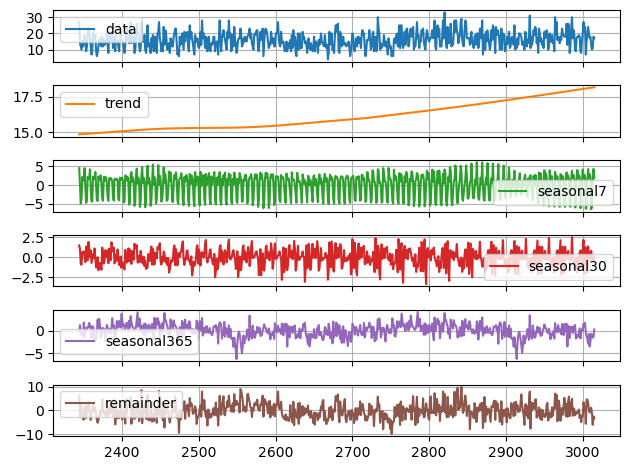

In [27]:
import matplotlib.pyplot as plt
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

